## Transport Mode Detection - Nimish Agarwal (170440)

###Setup

In [1]:
#  Mounting Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive

Mounted at /content/drive
/content/drive


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import time
import io

In [3]:
MAIN_DIR = 'My Drive/4th year Stuff/CE784A/TMD_Dataset/'
DATASET_DIR = MAIN_DIR + 'cleaned.csv'

### Part 1 - Reading and Exploring Dataset

In [4]:
df = pd.read_csv(DATASET_DIR)
df.head()

,user,timestamp,x,y,z,class
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus


In [5]:
print(df.info())
print('classes: ', df['class'].unique())
# Unique users
print('Unique users: ', len(df['user'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5653053 entries, 0 to 5653052
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user       object 
 1   timestamp  object 
 2   x          float64
 3   y          float64
 4   z          float64
 5   class      object 
dtypes: float64(3), object(3)
memory usage: 258.8+ MB
None
classes:  ['bus' 'walk' 'car' 'bike' 'train' 'e-bike']
Unique users:  32


In [6]:
df.describe()

,x,y,z
count,5.653053e+06,5.653053e+06,5.653053e+06
mean,1.499442e+00,1.483885e+00,2.484874e+00
std,4.657316e+00,6.262899e+00,5.800348e+00
min,-7.321000e+01,-7.840000e+01,-7.844000e+01
25%,-1.300000e+00,-1.790000e+00,-9.600000e-01
50%,7.100000e-01,2.130000e+00,3.500000e+00
75%,4.650000e+00,6.260000e+00,7.320000e+00
max,7.840000e+01,7.834000e+01,7.840000e+01


### Part 2 - Number of Unique Sequences

In [7]:
df['timestamp'] =  pd.to_datetime(df["timestamp"])
df_temp = df[['user','class','timestamp']]

In [8]:
start=time.time()
 # get time difference by Row[i] - Row[i-1]
temp = (abs(df_temp['timestamp'][1:].reset_index(drop=True) - df_temp['timestamp'][:-1]) > timedelta(seconds = 10))
 # Changing mode
temp = temp | (df_temp['class'][1:].reset_index(drop=True) != df_temp['class'][:-1])
df_temp['gap'] = pd.concat([pd.DataFrame(data = [True]), temp  ] ).reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Per user per trasportation mode, No. of Unique Sequences

In [9]:
# Grouping dataset based on 
df_temp2 = (df_temp.groupby(['user','class','gap']).count()).reset_index()
# Findng no. of unique sequences
df_temp2 = df_temp2[df_temp2.gap != False]
# taking 3 columns for simplicity
df_temp2 = df_temp2[['user','class','timestamp']]
df_temp2 = df_temp2.rename(columns={"timestamp":"Sequences"}) 
df_temp2 = df_temp2.reset_index(drop=True).groupby(["user","class","Sequences"]).count() #dropping index
pd.set_option('display.max_rows', len(df_temp2))
display(df_temp2)
pd.reset_option('display.max_rows')
end=time.time()
print("Time to run the code :" ,end-start)

Empty DataFrame
Columns: []
Index: [(a2d80ed662f34d32951eb1c6ed076c313e358b73, bus, 13), (a526f3566e9c9024dfa7378eb4291d787a09fd37, car, 15), (a526f3566e9c9024dfa7378eb4291d787a09fd37, walk, 19), (a59868c6eb3645eedbb343ce8c336ec6f2ef2324, bike, 39), (a59868c6eb3645eedbb343ce8c336ec6f2ef2324, bus, 27), (a59868c6eb3645eedbb343ce8c336ec6f2ef2324, car, 68), (a59868c6eb3645eedbb343ce8c336ec6f2ef2324, walk, 12), (a92dee88f61123f923dccec01eeecf1a81953b36, bus, 4), (ac4c17afeb69b39169eb301ab592696a8f353976, car, 20), (ac4c17afeb69b39169eb301ab592696a8f353976, walk, 58), (adaaae1a67ea9e43abd60ba945eccda0cb8821e0, bus, 22), (adaaae1a67ea9e43abd60ba945eccda0cb8821e0, car, 17), (adaaae1a67ea9e43abd60ba945eccda0cb8821e0, walk, 10), (b138d165100ef60bc793cac143742eb5aea4d6ba, car, 9), (b45157069942d01310c3e7b74034166717bb25f9, car, 3), (b45157069942d01310c3e7b74034166717bb25f9, walk, 2), (b7b165e5637b5a0226068d907748f4bbfc61a320, car, 194), (b7b165e5637b5a0226068d907748f4bbfc61a320, walk, 10), (c453226e3616ae821cdcb38f38481c2a20f2482f, bike, 169), (c453226e3616ae821cdcb38f38481c2a20f2482f, bus, 291), (c5702d34b238fe68683f818e82cd3a3cd8a16366, bike, 15), (c5702d34b238fe68683f818e82cd3a3cd8a16366, bus, 14), (c5702d34b238fe68683f818e82cd3a3cd8a16366, walk, 129), (ca7950f223a8037b897d0547075dc138f9e43b20, walk, 3), (cace4ec0999436917986b4fa6e9317262c897bc2, car, 72), (cbde60baea002b694ecf2a3ff2d95be16b00efe1, bus, 4), (ce39f5d0705695fcd70a04ba6d84ac6beecd6f9c, bus, 22), (ce39f5d0705695fcd70a04ba6d84ac6beecd6f9c, car, 80), (d429974540bfd38c3367fe9f0c8682775ff4fa18, bus, 6), (d429974540bfd38c3367fe9f0c8682775ff4fa18, car, 132), (d429974540bfd38c3367fe9f0c8682775ff4fa18, walk, 2), (d7a1230d94f91a32cc079809748e52e8a4a6a22f, bike, 152), (d7a1230d94f91a32cc079809748e52e8a4a6a22f, train, 13), (d7a1230d94f91a32cc079809748e52e8a4a6a22f, walk, 6), (d7dd12d83c81574137f858034b99f4cc83ab0718, car, 147), (d8c047eaaee204b7b5cd71e2d67308b87b038ed3, car, 12), (d8c047eaaee204b7b5cd71e2d67308b87b038ed3, walk, 24), (dc0bdce306ec3b624fe0e6ecd1ffbd82cb970120, bike, 115), (dc0bdce306ec3b624fe0e6ecd1ffbd82cb970120, car, 32), (dc0bdce306ec3b624fe0e6ecd1ffbd82cb970120, walk, 5), (dd82e3df4bebc74ed6b67877be79e29f401c16a3, car, 68), (dd82e3df4bebc74ed6b67877be79e29f401c16a3, walk, 2), (dde95e125d89843f7032baa734ee4d34ec775aaf, bus, 5), (dde95e125d89843f7032baa734ee4d34ec775aaf, car, 2), (dde95e125d89843f7032baa734ee4d34ec775aaf, walk, 8), (de9892b879c83ea3d24fb4560873107cc4e86d48, car, 114), (de9892b879c83ea3d24fb4560873107cc4e86d48, walk, 36), (dfcfc0404691b73b69884073159f90843f2ac35b, bus, 50), (dfcfc0404691b73b69884073159f90843f2ac35b, car, 108), (dfcfc0404691b73b69884073159f90843f2ac35b, walk, 155), (e429a95c532f1117130c11e4a18379d84fa4ffa9, bus, 40), (e429a95c532f1117130c11e4a18379d84fa4ffa9, car, 39), (eb9e7854290fd6ea9ebaf448b640fc1f1dbeb076, bus, 2), (eb9e7854290fd6ea9ebaf448b640fc1f1dbeb076, train, 1), (eb9e7854290fd6ea9ebaf448b640fc1f1dbeb076, walk, 2), (ecfb0929250fb6dda66a4065441230ab27f094e5, car, 158), (ecfb0929250fb6dda66a4065441230ab27f094e5, e-bike, 16), (ecfb0929250fb6dda66a4065441230ab27f094e5, train, 1), (ed623d28c1e0071632a6110b8f8ed93f8af78b99, bus, 10), (ed623d28c1e0071632a6110b8f8ed93f8af78b99, car, 117), (ed623d28c1e0071632a6110b8f8ed93f8af78b99, walk, 4), (f1b7331b66e404c11eebb22933e733117bbb12c9, bike, 172), (f1b7331b66e404c11eebb22933e733117bbb12c9, car, 139), (f1b7331b66e404c11eebb22933e733117bbb12c9, walk, 73), (f5edd999397145a2ec1b244226fc83f99631760c, bus, 16), (f5edd999397145a2ec1b244226fc83f99631760c, walk, 13), (f7ae1ce141c26db40ea8b090fb568a0c965310aa, car, 2), (faae5be800be2dfa897eea0bd2e5988cd53c4ec0, bike, 136), (faae5be800be2dfa897eea0bd2e5988cd53c4ec0, car, 10), (faae5be800be2dfa897eea0bd2e5988cd53c4ec0, walk, 35)]

Time to run the code : 1.8916699886322021


### Part 3 - Time Window Partition

In [10]:
df = pd.read_csv(DATASET_DIR)
df['timestamp'] =  df['timestamp'].astype('datetime64[s]')

In [11]:
start=time.time()
def helper_func(temp):
    temp = temp["timestamp"]
    temp = pd.DataFrame(data = temp).set_index("timestamp")
    temp["val"] = np.ones(len(temp))
    temp = temp.groupby(temp.index).count()
    temp = temp.resample('5s', origin='start').count()
    return len(temp[temp.val != 0])

In [14]:
# preprocessing data 
df_temp = df[['user','class','timestamp']]
temp = (abs(df_temp['timestamp'][1:].reset_index(drop=True) - df_temp['timestamp'][:-1]) > timedelta(seconds = 10))
df_temp['gap'] = pd.concat([pd.DataFrame(data = [True]), temp  ] ).reset_index(drop=True)
df_temp2 = df_temp[df_temp["gap"] == True]
df_temp2 = (df_temp2.groupby(['user','class','gap']).apply(lambda x : x)).reset_index().drop(['gap'], axis=1)
df_temp2["end_timestamp"] = df_temp.reset_index()["timestamp"].iloc[(df_temp2["index"]-1).to_numpy()[1:]].reset_index(drop=True)
df_temp2["end_timestamp"].iloc[-1] = df["timestamp"].iloc[-1]
df_temp2[">than5sec"] = ((df_temp2["end_timestamp"] - df_temp2["timestamp"])  >= timedelta(seconds = 5))
df_temp2["start_index"] = (df_temp2["index"].to_numpy())
df_temp2["end_index"] = np.concatenate((((df_temp2["index"]-1).to_numpy()[1:]),[len(df)-1]),axis = 0)
# starting and ending of each sequence
df_temp3 = df_temp2[df_temp2[">than5sec"] == True] 
a = list(range(df_temp3["start_index"].iloc[0] , df_temp3["end_index"].iloc[0]-df_temp3["start_index"].iloc[0]+1 ))
for i in range(1,len(df_temp3)):
    a.extend(list(range(df_temp3["start_index"].iloc[i] , df_temp3["end_index"].iloc[i] +1) ))
df6 = df.iloc[a]

df_temp3 = pd.DataFrame(df6.groupby(["user","class"]).apply(helper_func))
df_temp3 = df_temp3.reset_index().rename(columns={0:"#5_SecWindowSequences"}).groupby(["user","class","#5_SecWindowSequences"]).count()
df_temp3 = df_temp3.reset_index().groupby(["class"]).sum().reset_index()
display(df_temp3)
end=time.time()
print("Time to run the code :" ,end-start)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,class,#5_SecWindowSequences
0,bike,2958
1,bus,10543
2,car,20419
3,e-bike,78
4,train,594
5,walk,5825


Time to run the code : 38.75357675552368


### Part 4 - Feature Engineering

#### Extracting statistical features

In [15]:
def feature_extraction(temp):
    return temp.set_index("timestamp").resample('5s', origin='start').agg({'x':['mean','max','min','std'],'y':['mean','max','min','std'],'z':['mean','max','min','std']})

In [16]:
df_temp3 = pd.DataFrame(df6.groupby(["user","class"]).apply(feature_extraction)).reset_index().dropna()
df_temp3.columns = [''.join(col).strip() for col in df_temp3.columns.values]
df_temp3.head()
print(df_temp3.shape)

(40366, 15)


#### Box Plots

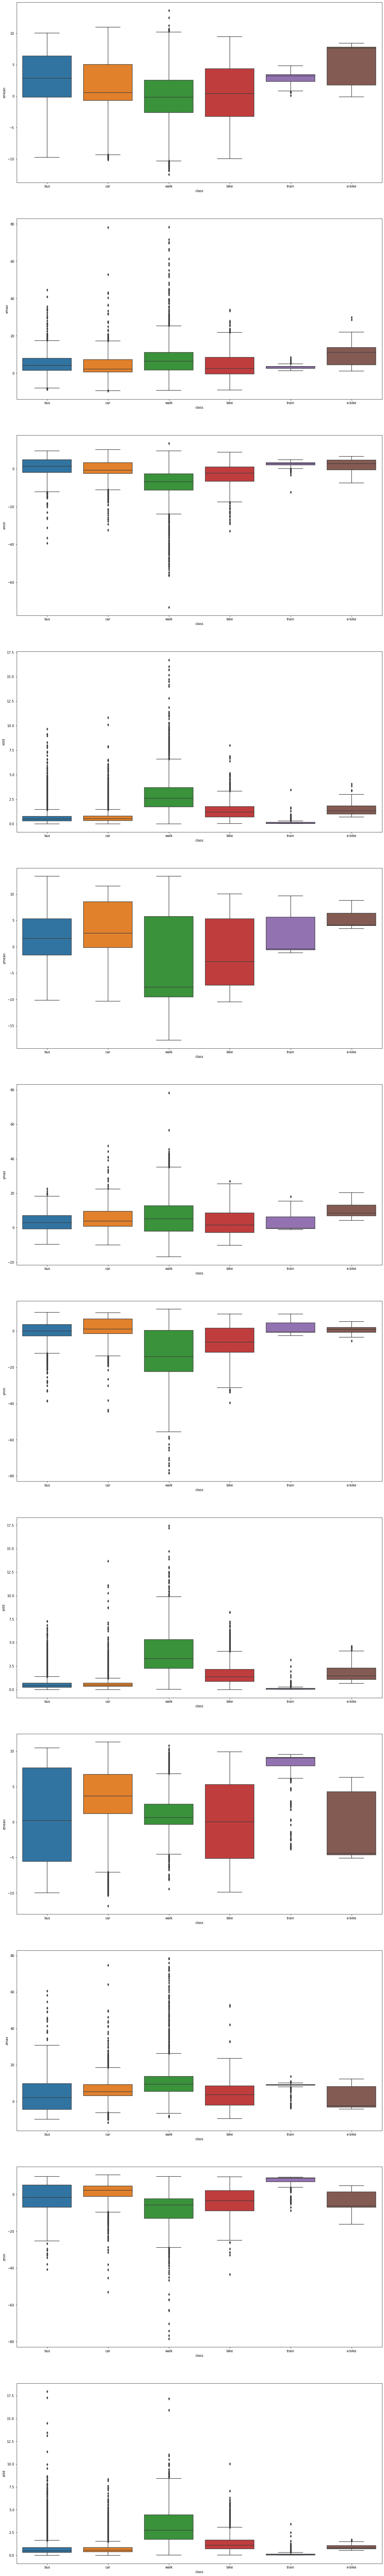

In [34]:
# Box Plots
fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(20,12*12))
for i in range(3,15):
    sns.boxplot(x=df_temp3["class"], y=df_temp3.iloc[:,i], data=df_temp3, ax=axes[i-3])

### Part 5 - Creating Balanced Dataset

In [18]:
# Choosing 78 rows from each mode randomly
MinDataPoints = min(df_temp3.groupby(['class']).apply(lambda x: len(x)))
print("Minimum Data Points in any Transportatation Mode => ", MinDataPoints)

def fun2(temp):
    return temp.sample(n = 78) 
df_new = df_temp3.groupby(["class"]).apply(fun2)
df_new =  df_new.reset_index(drop=True).iloc[:,1:].drop('timestamp',axis = 1).rename(columns={'class':'target'})
pd.DataFrame(df_new.groupby(["target"]).apply(lambda x:len(x))).rename(columns={0:"#DataPoints"}).reset_index()

Minimum Data Points in any Transportatation Mode =>  78


,target,#DataPoints
0,bike,78
1,bus,78
2,car,78
3,e-bike,78
4,train,78
5,walk,78


In [19]:
df_new.shape

(468, 13)

### part 6 - Splitting dataset

#### Splitting

In [20]:
X = df_new.drop('target', axis=1)
Y = df_new['target']

In [21]:
from sklearn.model_selection import train_test_split 

x, x_test, y, y_test = train_test_split (X, Y, test_size=0.2, train_size=0.8)
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size = 0.25, train_size =0.75)

In [22]:
print('No. of Datapoints:')
print('Training = ', len(x_train))
print('Cross Validation = ', len(x_cv))
print('Testing = ', len(x_test))

No. of Datapoints:
Training =  280
Cross Validation =  94
Testing =  94


### Part 7 - ML Model

#### LogRegr., SVM, decision tree and random forest classifier

In [23]:
# Turn the values into an array for feeding the classification algorithms.
x = x.values
x_train = x_train.values
x_test = x_test.values
x_cv = x_cv.values
y = y.values
y_train = y_train.values
y_test = y_test.values
y_cv = y_cv.values

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from collections import Counter
from sklearn.pipeline import make_pipeline
import collections
import warnings
warnings.filterwarnings("ignore")

In [25]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC(kernel='linear', C=1),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

classrep = []
confusionmatrices = {}
predicts = {}
kfold = KFold(n_splits=4, random_state=42)
for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    results = cross_val_score(classifier, x, y, cv = kfold)
    print("Classifier: "+classifier.__class__.__name__+" has a cross val score Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    predictions = classifier.predict(x_test)
    print('Classification Report of ',key,':\n',classification_report(y_test, predictions))
    predicts[key] = predictions
    classrep.append(classification_report(y_test, predictions));
    confusionmatrices[key] = confusion_matrix(y_test,predictions);

Classifier: LogisticRegression has a cross val score Accuracy: 65.763% (2.441%)
Classification Report of  LogisiticRegression :
               precision    recall  f1-score   support

        bike       0.47      0.39      0.42        18
         bus       0.35      0.32      0.33        19
         car       0.67      0.50      0.57        20
      e-bike       0.71      0.94      0.81        18
       train       0.67      1.00      0.80         8
        walk       0.45      0.45      0.45        11

    accuracy                           0.56        94
   macro avg       0.55      0.60      0.57        94
weighted avg       0.55      0.56      0.55        94

Classifier: SVC has a cross val score Accuracy: 68.706% (2.451%)
Classification Report of  Support Vector Classifier :
               precision    recall  f1-score   support

        bike       0.42      0.44      0.43        18
         bus       0.47      0.47      0.47        19
         car       0.62      0.50      0.56  

#### Artificial Neural Network

In [26]:
# Implementing ANN
# multi-class classification with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [27]:
X = df_new.drop('target', axis=1)
Y = df_new['target']

In [28]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [29]:
from sklearn.model_selection import train_test_split 

x, x_test, y, y_test = train_test_split (X, dummy_y, test_size=0.2, train_size=0.8)

In [30]:
print(x.shape)
print(y.shape)

(374, 12)
(374, 6)


In [31]:
n_inputs = x.shape[1]
y_out = y.shape[1]

# Defining Model
def baseline_model():
    model = Sequential()
    model.add(Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_out, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [33]:
# Fitting and cross-validating ANN
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, x, y, cv=kfold)
print("Neural Network Accuracy: %.2f%% (std. dev - %.2f%%)" % (results.mean()*100, results.std()*100))

Neural Network Accuracy: 74.86% (std. dev - 4.26%)
